##### Algorithms and Data Structures (Winter - Spring 2022)

* [Table of Contents](ADS_TOC.ipynb)
* <a href="https://colab.research.google.com/github/4dsolutions/elite_school/blob/master/ADS_highschool_math.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
* [![nbviewer](https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.svg)](https://nbviewer.org/github/4dsolutions/elite_school/blob/master/ADS_highschool_math.ipynb)

# High School Mathematics

High school mathematics is a moving target and to track it is to change it, if only by adding to one's awareness of where we've been.  Nor does every subculture follow the same evolutionary path.  The Republic of South Africa, which I've had the privilege of visiting, faces a different set of challenges than California or Oregon.  Different, yet partially overlapping.

One entry point into the many debates is the role of technology and how should it be used.  

In this Jupyter Notebook, we look at the actual and/or potential role of Jupyter Notebooks along with their wider ecosystem.  Historically speaking, they developed from the Python world as I-Python Notebooks.  

Nowadays, Jupyter Notebooks may be used to introduce several computer languages.  But what do computer languages have to do with mathematics?  Nothing?  

## The Function and The Set

In the several states of North America, the pre-college curriculum saw a sudden infusion of new rigor in the early 1960s, from specific corners (SMSG, University of Chicago), aimed at bolstering the sophistication of American children.  Elementary schoolers tackled the union and intersection of sets, and in algebra took up "functions" in a more serious and formal way. 

The arithmetic of grocery shopping, savings, managing a farm, was being displaced by what they called the New Math.  Some joked about it, others found it too menacing to be a laughing matter.

Sets would be our primary data structures going forward and these included the progressively more encompassing, all of them infinite, sets of number types:  

* Counting Numbers, or set $\mathbb{N}$ 
* Whole Numbers $\mathbb{W}$
* Integers $\mathbb{Z}$
* Rationals $\mathbb{Q}$
* Reals $\mathbb{R}$ 
* Complex numbers $\mathbb{C}$ 

each a superset of the next previous.

$$
\mathbb{N} \subset  
\mathbb{W} \subset 
\mathbb{Z} \subset 
\mathbb{Q} \subset 
\mathbb{R} \subset 
\mathbb{C}
$$

The Naturals break up into Primes and Composites.  The Reals break up into Rationals and Irrationals, amidst a lot of philosophy.  Irrationals include the Transcendentals.

Functions, a subtype of Relations, define puzzles regarding finding their "roots" or "zeros" along with local "minima" and "maxima".   More generally, they're but mappings, of a domain set to a range set, with ballistics metaphors implied. 

The "solution space" would be with respect to one of these number sets, if indeed numbers were at the heart of the solving algorithm.  Complex numbers give us the ability to find the n roots of an equation to the nth degree.  They would give us the complex plane and the ability to visualize fractals.  They would integrate deeply with trig, by way of exponentials and logarithms.

## Primes and Composites

Some high school mathematics curricula are in a hurry to get to precalculus and calculus, by way of the real numbers $\mathbb{R}$. Topics in Number an Group Theory might be offered in the elective category, under the generic heading of Discrete Mathematics.

With the rise of digital processing and cryptography, we can make the case that RSA and/or some other public key cryptography algorithm should be leveraged for what it might teach us about Discrete Mathematics.

In the case of RSA, we have Fermat's Little Theorem and Euler's theorem regarding the totient, i.e. the number of totatives of a number N, to think about.  Defining totatives requires knowing about the GCD, at which point we introduce Euclid's Method.

Euclid's Method in turn anchors a number of topics, including its own extended version.

Would this be an opportune time to introduce a type of number that as a built-in modulus?  We could get started, adding more frills in future spirals.

## The Rational Numbers

A first or second excuse to introduce operator overloading and to code a substantial "math object" comes with the rational numbers of Fraction type.  

Python has a fraction.Fraction in the Standard Library, along with math.gcd, but neither need not stop us from using our own code.

We may start writing a own Rational Number class, which keeps track of the integer numerator and denominator.

## The Permutation

In how many distinct orders might a deck of 52 be shuffled?  

Every card is unique.  We have 52 to choose from for the first card, with one of 51 remaining for the second and so on:  52 * 51 * 50 ... * 1.  That's an astronomically large number: 52 factorial or $52!$ or....

In [1]:
import math
math.factorial(52)  # showing off Python's arbitrary length int type

80658175170943878571660636856403766975289505440883277824000000000000


Permutations take us into Combinatorics, and are also our bridge into Abstract Algebra, wherein permutations come in groups, i.e. with a binary group operation. They also come with a unary operator for obtaining the inverse of any element.

Assuming the object oriented paradigm is going to stay relevant, Python's way of doing operator overloading comes into play with the P type.  We'll want to defind `__mul__` and several other operators using "magic methods" or "special names" (same thing).

A permutation might map the letters 'a-z' (lowercase ascii) plus space, to that same set in a different order, one-to-one.  That's a permutation, or "shuffle" of the 27 elements 'a-z' + space.

Permutation objects are a lot like dictionaries in associated every key with a corresponding value.

In [2]:
from px_class import P

In [3]:
p = P().shuffle()
q = P().shuffle()
e = P()

To multiply two permutations is to conjoin their mappings such that: 

Option 1:

* if $p[x] \rightarrow y$ and 
* $q[y] \rightarrow z$ then 
* $(p * q)[x] \rightarrow z$

Or sometimes it's the other way around:

Option 2:

* if $q[x] \rightarrow y$ and 
* $p[y] \rightarrow z$ then 
* $(p * q)[x] \rightarrow z$

We go with option 1 with the P class inside of `px_class.py`.

In [4]:
p['a']  

's'

In [5]:
q[p['a']] 

'f'

In [6]:
(p * q)['a']

'f'

In [7]:
(~q * q) == e

True

In [8]:
c = q("letter substitution code")
c

'nqooqxmfvwfozovozcsmbcuq'

In [9]:
(~q)(c)

'letter substitution code'

## The Vector

High school math has conventionally introduced (x, y) and (x, y, z) coordinates twice, the first time without vector notation, the second time with.

Given an object oriented computer language, why not start with Vectors?  

Introduce operator overloading and implement vector addition and subtraction, along with scalar multiplication and division.

Expand to include dot and cross products.

In [10]:
import numpy as np

class Vector:
    
    def __init__(self, x, y, z):
        self.v = np.array((x, y, z))
        
    def __add__(self, other):
        v_sum = self.v + other.v
        return Vector(*v_sum)
    
    def __neg__(self):
        return -1 * self
    
    def __sub__(self, other):
        v = (self + (-other))
        return Vector(*v)
                      
    def __mul__(self, scalar):
        v = scalar * self.v
        return Vector(*v)
    
    __rmul__ = __mul__
    
    def __truediv__(self, scalar):
        new_v = (1/scalar) * self.v
        return Vector(*new_v)
    
    def norm(self):
        return Vector(*(self.v/self.length))
    
    @property
    def length(self):
        x, y, z = self.v
        return np.sqrt(x**2 
                       + y**2 
                       + z**2)
    
    def __repr__(self):
        return 'Vector({},{},{})'.format(*self.v)

In [11]:
v0 = Vector(1,2,3)
v1 = Vector(3,2,1)

In [12]:
v0 + v1

Vector(4,4,4)

In [13]:
3 * v0

Vector(3,6,9)

In [14]:
(1/3) * v0

Vector(0.3333333333333333,0.6666666666666666,1.0)

In [15]:
v0.length

3.7416573867739413

In [16]:
v0.norm()

Vector(0.2672612419124244,0.5345224838248488,0.8017837257372732)

## Computer Graphics

Once we're in the space of spatial vectors, a next challenge is to phase in computer graphics, by way of the polyhedrons.  

Vectors with a shared tail at the origin fan out to give the surface features of a polyhedron, in terms of Edges (pairs of vectors) and Faces (cycles of Edges).

In this curriculum, once the topic of Polyhedrons is broached, we take the liberty of diving into Americana associated with the polymath inventor Buckminster Fuller.  Depending how far down that rabbit hole we want to go, we have the option of introducing [Quadray Coordinates](https://en.wikipedia.org/wiki/Quadray_coordinates) and learning the Vector stuff a second time from another perspective.

In particular, we might use Quadrays to [generate the CCP](https://nbviewer.org/github/4dsolutions/Python5/blob/master/Generating%20the%20FCC.ipynb) (cubic close packing).

<a data-flickr-embed="true" href="https://www.flickr.com/photos/kirbyurner/479693571/in/photolist-2ndRLQZ-2nbQMuQ-2mskcxr-2m29ojG-2m29ok8-2j8odSY-2fn4VBT-8thDyL-8ryECF-8iYyKN-7eU7h4-JoybP-Joybi" title="Rhombic Dodecahedra"><img src="https://live.staticflickr.com/190/479693571_ff580af964_m.jpg" width="240" height="234" alt="Rhombic Dodecahedra"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>

## Linear Algebra

High school mathematics curricula have conventionally not sought to introduce Linear Algebra is a formal topic, short of demonstrating methods for solving simultaneous linear equations.

In this curriculum, a motivation for learning the of matrix times vector mechanics is to apply rotation matrices to a Polyhedron.  We also may use the determinant of a matrix to study [Polyhedron volumes](TheCabal.ipynb).

## Plotting

A function we usually come to, as a pre-requisite for calculus, is the polynomial.  

Before we integrate or differentiate such a curve, we learn to (a) plot it on graph paper (i.e. the screen) and (b) to find its roots, or zeros.

Plain old Python (pop) doesn't have the `linspace` or `arange` though one might code them in pure Python. Instead, why not introduce "array based computing" at the outset, with an eye towards syncing with data science tutorials and the broader Python ecosystem?  Other languages are array-based as well, enabling jumping to other languages, such as J.

The numpy package provides a context for a new kind of list object, the n-dimensional array, suitable for navigating amidst n-d polytopes (Coxeter) if that's your gig.  A lot of us stay with row by column matrix-like data structures, 2-dimensional.

In [17]:
import numpy as np
import matplotlib.pyplot as plt

Chop a number line (like making sausage) into 200 points exactly, so 199 intervals, starting and ending on the two points you give it.  Return an n-d array of only one dimension, as shown by `obj.shape`.

In [18]:
rat_domain = np.linspace(-5, 5, 200)  # rational domain, expressed in floating points

In [19]:
print("Length: ", len(rat_domain))
print("d-type: ", rat_domain.dtype)
print(" Shape: ", rat_domain.shape)
print("   Dim: ", rat_domain.ndim)

Length:  200
d-type:  float64
 Shape:  (200,)
   Dim:  1


The code below looks like ordinary Python, however if `domain` then powering (`**`) will by applied element-wise to all 200 data points, with no explicit looping required.  This is what array-based computing entails:  working with whole rafts of numbers without explicitly iterating over them.

In [20]:
def power_curve(domain, the_power):
    return domain ** the_power

In [21]:
out_range_1 = power_curve(rat_domain, 1) # linear relationship 

In [22]:
out_range_2 = power_curve(rat_domain, 2) # 2nd power, parabola

In [23]:
out_range_3 = power_curve(rat_domain, 3) # 3rd power, inflection point

And now for our final star player: pandas.  The pandas package is home to a Series, a single column of data, of any data type.  Series objects standing side-by-side, define the DataFrame, a  spreadsheet analog, inspired by R (a grand daddy workhorse language in statistics world, still going strong, works with Jupyter).

In [24]:
import pandas as pd

In [25]:
table = pd.DataFrame({1:out_range_1, 
                      2:out_range_2, 
                      3:out_range_3},
                      index = rat_domain)
table.head()

,1,2,3
-5.000000,-5.000000,25.000000,-125.000000
-4.949749,-4.949749,24.500013,-121.268907
-4.899497,-4.899497,24.005076,-117.612808
-4.849246,-4.849246,23.515189,-114.030942
-4.798995,-4.798995,23.030353,-110.522547


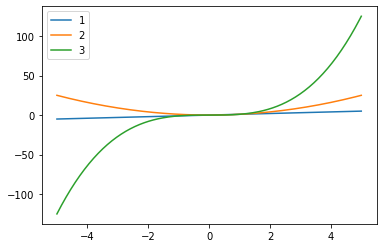

In [26]:
table.plot();

We have looked at sympy in other chapters, however maybe not in a classic high school setting, where expanding and factoring polynomials is the order of the day.  Once we have wrapped our minds around polynomial functions, we are ready to integrate and differentiate, or so the thinking goes. They lend themselves to these operations, as manual algorithms, very nicely.

In [27]:
import sympy as sp

In [28]:
x = sp.Symbol('x')
poly = (x - 3)*(x + 2)*(x - 5)*(x + 7)
poly

(x - 5)*(x - 3)*(x + 2)*(x + 7)

In [29]:
poly.expand()

x**4 + x**3 - 43*x**2 + 23*x + 210

Here's a bridge to that Lambda Calculus, in that lambda has a meaning of "any function" and in the context below, makes an expression ready to iterate through some numpy array.  It "vectorizes" in other words, a term used by numpy itself.  Without resorting to for loop constructs, or mentioning indices, the `poly` expression races through our 400 point domain, applying itself to each x.

The original domain, and the corresponding range (linked by poly), stand side by side as columns, in a pandas DataFrame.  From the DataFrame object, we may plot directly.

In [30]:
f = sp.lambdify(x, poly, 'numpy')

In [31]:
domain = np.linspace(-7.5,7.5,400)
data_f = pd.DataFrame({"f(x)": f(domain)}, 
                      index = domain)
data_f.index.name = 'x'
data_f.head()

,f(x)
x,
-7.500000,360.937500
-7.462406,329.337298
-7.424812,298.496719
-7.387218,268.406589
-7.349624,239.057783


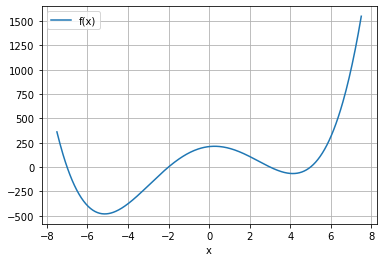

In [32]:
data_f.plot(grid=True);

## Circular Functions

From polynomials we move to the trigonometric functions and properties such as amplitude and frequency.

The grand unification of circular functions and exponential functions on the Complex plane marks another branch point, where we optionally dive into fractals.

In [33]:
domain = np.linspace(-10, 10, 400)
data_trig = pd.DataFrame({"sin(x)": np.sin(domain),
                         "cos(x)": np.cos(domain)},
                      index = domain)
data_trig.index.name = 'radians'
data_trig.head()

,sin(x),cos(x)
radians,,
-10.000000,0.544021,-0.839072
-9.949875,0.501297,-0.865275
-9.899749,0.457313,-0.889306
-9.849624,0.412181,-0.911102
-9.799499,0.366013,-0.930610


The plot we get by calling the plot method on our DataFrame (`data_trig`) with no arguments is already more than acceptable.  Capturing the output as `ax` was optional in this case, but in future examples (below), customizing title, labels and legend involve communicating with this "axes" object.  

matplotlib is is complicated package in giving us lots of objects we might want to communicate with, about line thickness, marker size, label fonts and so on. 

Your high school might refer you to various resources to help you continue broadening your vocabulary, while deepening your fluency, with this or any other package.  The math course itself might externalize some of these details.

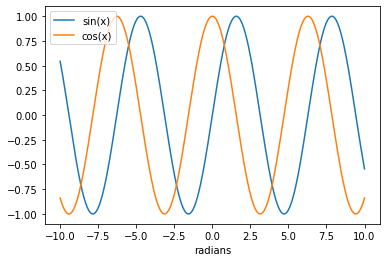

In [34]:
ax = data_trig.plot()

A jump to the topic of alternating current and hydro-dam generators as a topic would appropriately go here.  The application of circular functions to electricity concepts comes up a lot in high school physics.

The final roundup of critical functions comes with Euler's famous formula:

$$
e^{ \pm i\theta } = \cos \theta \pm i\sin \theta
$$

In [35]:
theta = sp.Symbol('theta')

In [36]:
cos_series = sp.cos(theta).series()
cos_series

1 - theta**2/2 + theta**4/24 + O(theta**6)

In [37]:
i_sin_series = sp.I * sp.sin(theta).series()
i_sin_series

I*(theta - theta**3/6 + theta**5/120 + O(theta**6))

In [38]:
exponential = sp.exp(sp.I * theta)
exponential

exp(I*theta)

In [39]:
exponential.series()

1 + I*theta - theta**2/2 - I*theta**3/6 + theta**4/24 + I*theta**5/120 + O(theta**6)

In [41]:
expr = cos_series + i_sin_series
expr.simplify()

1 + I*theta - theta**2/2 - I*theta**3/6 + theta**4/24 + I*theta**5/120 + O(theta**6)

In [42]:
euler = sp.lambdify(theta, exponential, 'numpy')

In [43]:
domain     = np.linspace(0, 10, 200)  # for wrapping around and around the circle
data_euler = pd.DataFrame({"euler(r)": euler(domain)},  # r for radians
                            index = domain)
data_euler.index.name = 'radians'
data_euler.head()

,euler(r)
radians,
0.000000,1.000000+0.000000j
0.050251,0.998738+0.050230j
0.100503,0.994954+0.100333j
0.150754,0.988658+0.150183j
0.201005,0.979866+0.199654j


In [44]:
data_euler.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 200 entries, 0.0 to 10.0
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype     
---  ------    --------------  -----     
 0   euler(r)  200 non-null    complex128
dtypes: complex128(1)
memory usage: 4.7 KB


In [45]:
euler_df = data_euler.copy() # keep a backup before adding columns
euler_df["cos(r)"] = euler_df["euler(r)"].apply(lambda x: x.real)
euler_df["sin(r)"] = euler_df["euler(r)"].apply(lambda x: x.imag)

In [46]:
euler_df.head()

,euler(r),cos(r),sin(r)
radians,,,
0.000000,1.000000+0.000000j,1.000000,0.000000
0.050251,0.998738+0.050230j,0.998738,0.050230
0.100503,0.994954+0.100333j,0.994954,0.100333
0.150754,0.988658+0.150183j,0.988658,0.150183
0.201005,0.979866+0.199654j,0.979866,0.199654


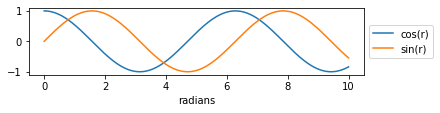

In [47]:
ax = euler_df.plot(y=["cos(r)", "sin(r)"])
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_aspect("equal")

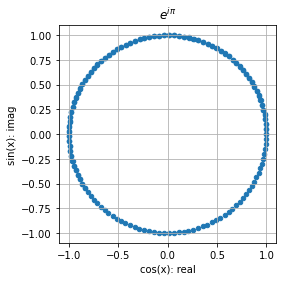

In [48]:
ax = euler_df.plot.scatter(x="cos(r)", y="sin(r)")
ax.set_aspect("equal")
ax.set_xlabel("cos(x): real")
ax.set_ylabel("sin(x): imag")
ax.set_title(r"$e^{i \pi}$")
ax.grid(True)

## Delta Calculus

The reason for calling it Delta Calculus is to get around using a proper name, such as "Newtonian", much as we're free to recapitulate his work in "fluxions".  

The reader is reminded of many calculi, as maths are full of them, and room for Lambda Calculus appears, with a kind of symmetry between them.  That's to expand the meaning of both, perhaps, to embrace their destinies.

The focus I've been adopting, as a curriculum dev, is to focus on the data science curve known as the Gaussian or normal curve.  This "bell curve" is very well thought out and much studied, and its integral, the CDF, is likewise prevalent as a pattern, such as when we watch a fad sweep through a population:  early adopters, over the hump, late adopters.  

How it all adds up looks like a lazy S, almost like the integral symbol itself $\int$.

The customary discussion of slope versus area, with the CDF plotting the PDF's growing area (integral), and the PDF plotting the CDF's changing slope (derivative), carries over into this more statistically minded context.  Calculus is our bridge to data science and its sociological topics, not just to the classical mechanics in physics.

Machine Learning is likewise a gateway into differential calculus as the idea of gradient descent starts quickly, with terrain metaphors.  We've all descended gradients.  We will get to slopes and tangent planes later.  

Starting with complex applications and then refining the concepts through progressive simplification, is something science is good at. We look for the generalizable patterns.

In [49]:
domain = np.linspace(-6, 6, 500)

In [50]:
x, σ, μ = sp.symbols(['x','σ', 'μ'])

In [51]:
f = sp.Symbol('f')

In [52]:
expr1 = (1/(σ * sp.sqrt(2 * sp.pi)))
expr2 = sp.exp(sp.Rational(-1,2) * ((x - μ)/σ)**2)
gaussian = expr2 * expr1
gaussian

sqrt(2)*exp(-(x - μ)**2/(2*σ**2))/(2*sqrt(pi)*σ)

Play around with $\mu$ and $\sigma$, the mean and standard deviation parameters, conventionally set to 0 and 1 respectively, for the most standard of the normal bell curves.  Play around with these.

In [53]:
standard = gaussian.copy()
standard = standard.subs(μ, 0)
standard = standard.subs(σ, 1)
standard

sqrt(2)*exp(-x**2/2)/(2*sqrt(pi))

In [54]:
IQ = gaussian.copy()
IQ = IQ.subs(μ, 100)
IQ = IQ.subs(σ, 15)
IQ

sqrt(2)*exp(-(x - 100)**2/450)/(30*sqrt(pi))

In [55]:
domain = np.linspace(-6, 6, 500)
f = sp.lambdify(x, standard, 'numpy') 
y_vals = f(domain)

In [56]:
bell_curve_df = pd.DataFrame({'x':domain, 'y':y_vals})
bell_curve_df.head()

,x,y
0,-6.000000,6.075883e-09
1,-5.975952,7.016936e-09
2,-5.951904,8.099059e-09
3,-5.927856,9.342657e-09
4,-5.903808,1.077098e-08


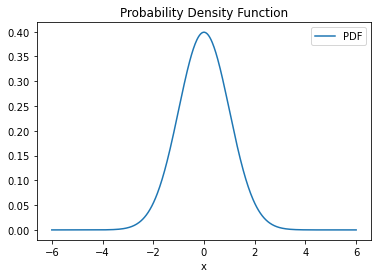

In [57]:
ax = bell_curve_df.plot(x='x', y='y')
ax.set_title("Probability Density Function");
ax.legend(['PDF']);

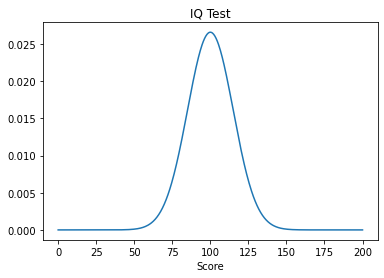

In [58]:
# create data structure
new_domain  = np.linspace(0, 200, 500)
iq_function = sp.lambdify(x, IQ, 'numpy') # IQ defined above
y_vals      = iq_function(new_domain)
iq_curve_df = pd.DataFrame({'x':new_domain, 'y':y_vals})

# plot
ax = iq_curve_df.plot(x='x', y='y', legend=None)
ax.set_xlabel("Score")
ax.set_title("IQ Test");

In [59]:
sp.integrate(standard, (x, -6, 6)).evalf(6)

1.00000

In [60]:
bell_curve_df

,x,y
0,-6.000000,6.075883e-09
1,-5.975952,7.016936e-09
2,-5.951904,8.099059e-09
3,-5.927856,9.342657e-09
4,-5.903808,1.077098e-08
...,...,...
495,5.903808,1.077098e-08
496,5.927856,9.342657e-09
497,5.951904,8.099059e-09
498,5.975952,7.016936e-09


In [61]:
h = abs(domain[0] - domain[1])
h

0.02404809619238435

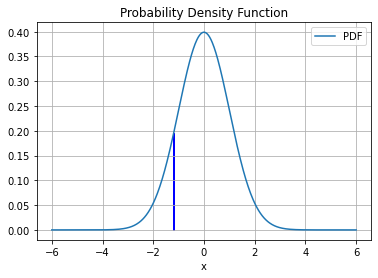

In [62]:
import matplotlib.patches as mpatches

ax = bell_curve_df.plot(x='x', y='y')
ax.set_title("Probability Density Function")
ax.grid(True)
ax.legend(['PDF'])

row = 200 # of 500 total
left, bottom, width, height = (bell_curve_df.iloc[row,0]-h/2,
                               0,h, # width h
                               bell_curve_df.iloc[row,1])
rect=mpatches.Rectangle((left,bottom),width,height, 
                        fill=True,
                        color="blue")
ax.add_patch(rect);

The area accumulating under the PDF registers as the CDF.  The area starts at zero then climbs more and more steeply.  The area continues to grow, but at a slowing rate.

The cumulative sum of thin rectanglar areas, each with a PDF y-value height, times a delta h width of about 0.024, approximates the numeric integral.  More and more rectangles get added.

The CDF levels off at 1.0, as it should, given it's tracking the area under the standard bell curve, of probability 1 its total area.  

Other PDFs, not bell curves, e.g. the Poisson Distribution, will also have a total area of 1 and a corresponding CDF cumulative sum.

In [63]:
bell_curve_df['CDF'] = np.cumsum(bell_curve_df['y']*h) # discrete integral

$$
\text{cdf} =  \int_{a}^{b} \text{pdf}(x) \,dx
$$

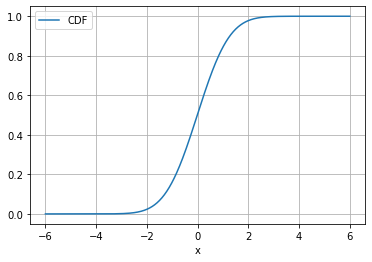

In [64]:
ax = bell_curve_df.plot(x='x', y='CDF')
ax.grid(True)

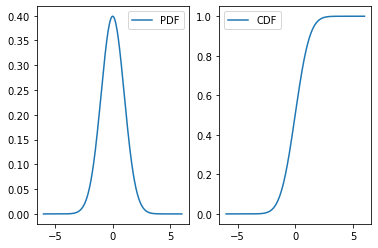

In [65]:
plt.subplots()
plt.subplot(121)
plt.plot(bell_curve_df['x'], bell_curve_df['y'])
plt.legend(['PDF'])
plt.subplot(122)
plt.plot(bell_curve_df['x'], bell_curve_df['CDF'])
plt.legend(['CDF']);

The CDF's slope registers as the PDF.  The slope starts at zero, then becomes positive and stays positive, but reaches a peak steepness at x=0, and then starts to again level off.

$$
\text{pdf} =  \frac{dy}{dx} \text{cdf}(x)
$$